# A2. Feature Extraction from Booking.com Reviews
## Swathi Banna

In [1]:
import re
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import spacy
import pickle
from collections import Counter


In [2]:
booking = pd.read_excel(r'C:\Users\Swathi\Documents\BAIS\Text Analytics\Assignments\A2 Booking.com reviews\BookingDotCom_HotelReviews.xlsx')
booking.head()

,Hotel_Name,Hotel_Address,Review_Count,Non_Review_Scoring_Count,Average_Hotel_Score,Review_Date,Reviewer_Nationality,Positive_Comments,Negative_Comments,Total_Reviewer_Reviews,Reviewer_Score,Tags
0,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-08-03,Russia,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-08-03,Ireland,No real complaints the hotel was great great ...,No Negative,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-31,Australia,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,9,7.1,"[' Leisure trip ', ' Family with young childre..."
3,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-31,United Kingdom,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-24,New Zealand,Amazing location and building Romantic setting,You When I booked with your company on line y...,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


In [3]:
booking.isnull().sum()

Hotel_Name                  0
Hotel_Address               0
Review_Count                0
Non_Review_Scoring_Count    0
Average_Hotel_Score         0
Review_Date                 0
Reviewer_Nationality        0
Positive_Comments           0
Negative_Comments           0
Total_Reviewer_Reviews      0
Reviewer_Score              0
Tags                        0
dtype: int64

In [492]:
# Taking a sample of 15000 reviews

booking = booking.sample(n=15000).reset_index(drop=True)

In [493]:
# Saving the sample file as pickle file

with open('booking_sample_pkl', 'wb') as pkl_file:
    pickle.dump(booking, pkl_file) 

In [38]:
with open('booking_sample_pkl', 'rb') as pkl_file:
    booking = pickle.load(pkl_file)

In [39]:
booking.shape

(15000, 12)

In [40]:
booking.head(3)

,Hotel_Name,Hotel_Address,Review_Count,Non_Review_Scoring_Count,Average_Hotel_Score,Review_Date,Reviewer_Nationality,Positive_Comments,Negative_Comments,Total_Reviewer_Reviews,Reviewer_Score,Tags
0,London Marriott Hotel West India Quay,22 Hertsmere Road Tower Hamlets London E14 4ED...,2836,930,8.9,2017-08-02,United Kingdom,Upgraded room to walk in shower room lovely,More tea coffee,4,10.0,"[' Leisure trip ', ' Couple ', ' Deluxe King o..."
1,Blakemore Hyde Park,30 Leinster Gardens Bayswater Westminster Boro...,6596,1198,8.5,2016-04-07,United Kingdom,The location was great and the room was clean...,The key for the room didn t work and i was le...,1,5.4,"[' Leisure trip ', ' Couple ', ' Club Double R..."
2,The Montague On The Gardens,15 Montague St Bloomsbury Camden London WC1B 5...,931,196,9.3,2017-03-04,Canada,The staff are incredible always friendly and ...,If I had to complain the pillows didn t suit me,17,10.0,"[' Leisure trip ', ' Solo traveler ', ' Classi..."


### Preprocessing

In [5]:
sp = spacy.load("en_core_web_sm")

In [108]:
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)

In [109]:
print(booking['Positive_Comments'].head(50))

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Upgraded room to walk in shower room lovely
1                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [110]:
print(booking['Positive_Comments'].head(50))

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Upgraded room to walk in shower room lovely
1                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [175]:
# Categorizing similar words for a meaningful analysis

station = ['stations', 'tram' , 'train', 'trains', 'railway', 'rail', 'metro']
room = ['room','rooms', 'bedroom']
bath = ['bath', 'shower', 'toilet', 'bathroom']
bed = ['bed', 'beds', 'pillow', 'pillows', 'mattress']
food = ['restaurants', 'restaurant', 'breakfast', 'sausages', 'cheesecake', 'meat', 
        'pizza', 'cereals', 'milk', 'eggs', 'coffee', 'buffet', 'lunch', 'dinner']
internet = ['wifi']
cost = ['price']

# Common words which don't give much information but appeared frequently in the postive/negative comments

remove = ['hotel', 'hotels','bit', 'day', 'night'] 
                                                    


In [176]:
# Using Spacy

sp_positive=[]
sp_negative=[]

for i in range(len(booking)):
    positive = sp(booking.iloc[i,7])
    negative = sp(booking.iloc[i,8])
    
    # Converting words to lower case, removing stop words & punctuations and selecting only NOUNS
    
    spPositiveWords = [w.text.lower() for w in positive if not w.is_stop and not w.is_punct and w.pos_ == 'NOUN']
    spNegativeWords = [w.text.lower() for w in negative if not w.is_stop and not w.is_punct and w.pos_ == 'NOUN']
    
    # Removing leading/trailing spaces, empty spaces, 1 & 2 letter words and common words.
    
    spPositiveWords = [w.strip() for w in spPositiveWords if ((w not in remove) and (len(w) > 2))]
    spNegativeWords = [w.strip() for w in spNegativeWords if ((w not in remove) and (len(w) > 2))]
    
    # Replacing similar words with a related word
    
    spPositiveWords = ['station' if w in station else 
                       'room' if w in room else 
                       'bath' if w in bath else 
                       'bed' if w in bed else
                       'food' if w in food else
                       'internet' if w in internet else
                       'cost' if w in cost 
                        else w for w in spPositiveWords]
    
    spNegativeWords = ['station' if w in station else 
                       'room' if w in room else 
                       'bath' if w in bath else 
                       'bed' if w in bed else
                       'food' if w in food else
                       'internet' if w in internet else
                       'cost' if w in cost 
                        else w for w in spNegativeWords]
    
    # saving the processed corpus into positive and negative lists
    
    sp_positive.append(spPositiveWords)
    sp_negative.append(spNegativeWords)

In [198]:
# Saving the positive corpus and negative corpus of all the reviews in 2 master lists 'posTotal' and 'negTotal'
# For answering question 1

posTotal = [word for sublist in sp_positive for word in sublist]
negTotal = [word for sublist in sp_negative for word in sublist]

In [199]:
# Appending positive and negative corpus to the dataframe

booking['Sp_Positive_Corpus']=sp_positive
booking['Sp_Negative_Corpus']=sp_negative

In [179]:
# Saving booking, posTotal and negTotal in pickle files

with open('booking_pkl', 'wb') as pkl_file:
    pickle.dump(booking, pkl_file) 

In [180]:
with open('posTotal_pkl', 'wb') as pkl_file:
    pickle.dump(posTotal, pkl_file)

In [181]:
with open('negTotal_pkl', 'wb') as pkl_file:
    pickle.dump(negTotal, pkl_file)

In [329]:
# Reading the pickle files and assigning the same file names

with open('booking_pkl', 'rb') as pkl_file:
    booking = pickle.load(pkl_file)    

In [320]:
with open('posTotal_pkl', 'rb') as pkl_file:
    posTotal = pickle.load(pkl_file)

In [321]:
with open('negTotal_pkl', 'rb') as pkl_file:
    negTotal = pickle.load(pkl_file)

In [322]:
print(Counter(posTotal).most_common(10))

[('room', 5007), ('staff', 4492), ('location', 4373), ('food', 3574), ('bed', 1789), ('station', 1499), ('bath', 912), ('service', 708), ('bar', 554), ('view', 482)]


#### Top five hotel features in positive reviews:
##### Room - 5007, Staff - 4492, Location - 4373, Food - 3574, Bed - 1789

Station is also another feature which has to be considered. It means customers might prefer a hotel if it has proximity to station.

In [323]:
print(Counter(negTotal).most_common(10))

[('room', 5838), ('food', 2599), ('bath', 1563), ('bed', 1223), ('staff', 970), ('cost', 573), ('service', 535), ('bar', 525), ('time', 523), ('floor', 479)]


#### Top five hotel features in negative reviews:
##### Room - 5838, Food - 2599, Bath - 1563, Bed - 1223, Staff - 970

Room is equally featured in both positive and negative reviews. Location is given a positive review in most of the cases whereas Bath has more negative reviews.

In [330]:
type(booking['Tags'])

pandas.core.series.Series

In [324]:
booking.head(3)

,Hotel_Name,Hotel_Address,Review_Count,Non_Review_Scoring_Count,Average_Hotel_Score,Review_Date,Reviewer_Nationality,Positive_Comments,Negative_Comments,Total_Reviewer_Reviews,Reviewer_Score,Tags,Sp_Positive_Corpus,Sp_Negative_Corpus
0,London Marriott Hotel West India Quay,22 Hertsmere Road Tower Hamlets London E14 4ED United Kingdom,2836,930,8.9,2017-08-02,United Kingdom,Upgraded room to walk in shower room lovely,More tea coffee,4,10.0,"[ Leisure trip , Couple , Deluxe King or Twin Room , Stayed 1 night , Submitted from a mobile device ]","[room, bath, room]","[tea, food]"
1,Blakemore Hyde Park,30 Leinster Gardens Bayswater Westminster Borough London W2 3AN United Kingdom,6596,1198,8.5,2016-04-07,United Kingdom,The location was great and the room was clean specially the bathroom,The key for the room didn t work and i was left wondering on the 5th floor what to do I went back to reception told them about the problem the door doesn t open and the girl at reception said it is fixed went back to the 5th floor in their elevator which i felt its gonna fall dawn any second but i reached 5th safely thank god to find that my problem haven t been solved and i went back to the reception for the third time to be told that they have to send someone to check it for me and look for the problem with the door they took 30 deposit when i arrived for a room that doesn t open and a mini bar that was empty Will not go there again for sure,1,5.4,"[ Leisure trip , Couple , Club Double Room , Stayed 1 night , Submitted from a mobile device ]","[location, room, bath]","[key, room, work, floor, reception, problem, door, girl, reception, floor, elevator, gon, dawn, problem, reception, time, problem, door, deposit, room, bar]"
2,The Montague On The Gardens,15 Montague St Bloomsbury Camden London WC1B 5BJ United Kingdom,931,196,9.3,2017-03-04,Canada,The staff are incredible always friendly and helpful The room was maintained twice a day and I always had a little surprise on my pillow when I went to bed Actually forgot my scarf in the room and the concierge ran over on the tube and brought it to me One of the best hotels I have stayed at plus location is perfect,If I had to complain the pillows didn t suit me,17,10.0,"[ Leisure trip , Solo traveler , Classic Single Room , Stayed 7 nights , Submitted from a mobile device ]","[staff, room, surprise, bed, bed, scarf, room, concierge, tube, location]",[bed]


In [331]:
posSolo = []
negSolo = []
posGroup =[]
negGroup =[]
posBusiness = []
negBusiness = []
posLeisure = []
negLeisure = []
posCouple = []
negCouple = []
posFamily = []
negFamily = []

for index, row in booking.iterrows():
    tags = row['Tags']
    for word in tags:
        if word.strip() == 'Solo traveler':
            posSolo.append(row['Sp_Positive_Corpus'])
            negSolo.append(row['Sp_Negative_Corpus'])
        elif word.strip() == 'Group':
            posGroup.append(row['Sp_Positive_Corpus'])
            negGroup.append(row['Sp_Negative_Corpus'])
        elif word.strip() == 'Business trip':
            posBusiness.append(row['Sp_Positive_Corpus'])
            negBusiness.append(row['Sp_Negative_Corpus'])
        elif word.strip() == 'Leisure trip':
            posLeisure.append(row['Sp_Positive_Corpus'])
            negLeisure.append(row['Sp_Negative_Corpus'])
        elif word.strip() == 'Couple':
            posCouple.append(row['Sp_Positive_Corpus'])
            negCouple.append(row['Sp_Negative_Corpus'])
        elif word.strip() == 'Family with young children':
            posFamily.append(row['Sp_Positive_Corpus'])
            negFamily.append(row['Sp_Negative_Corpus'])

In [ ]:
# Defining a function to flatten a list

def flatten_list(nested_list):
    flattened_list = [item for sublist in nested_list for item in sublist]
    return flattened_list

In [332]:
# Flattening the lists

pSolo = flatten_list(posSolo)
nSolo = flatten_list(negSolo)
pGroup = flatten_list(posGroup)
nGroup = flatten_list(negGroup)
pBusiness = flatten_list(posBusiness)
nBusiness = flatten_list(negBusiness)
pLeisure = flatten_list(posLeisure)
nLeisure = flatten_list(negLeisure)
pCouple = flatten_list(posCouple)
nCouple = flatten_list(negCouple)
pFamily = flatten_list(posFamily)
nFamily = flatten_list(negFamily)

In [333]:
from tabulate import tabulate

table_data = [
    ['Solo', len(posSolo)],
    ['Group', len(posGroup)],
    ['Business', len(posBusiness)],
    ['Leisure', len(posLeisure)],
    ['Couple', len(posCouple)],
    ['Family with young children', len(posFamily)]
]

print('Number of reviews for each category:')
print(tabulate(table_data, headers=['Category', 'Number of Reviews'], tablefmt='grid'))


Number of reviews for each category:
+----------------------------+---------------------+
| Category                   |   Number of Reviews |
+============================+=====================+
| Solo                       |                3115 |
+----------------------------+---------------------+
| Group                      |                1933 |
+----------------------------+---------------------+
| Business                   |                2441 |
+----------------------------+---------------------+
| Leisure                    |               12137 |
+----------------------------+---------------------+
| Couple                     |                7434 |
+----------------------------+---------------------+
| Family with young children |                1740 |
+----------------------------+---------------------+


#### Reviews by Leisure Travellers are the highest (12137) and Family with young children are the least (1740). 


### Top 6 features in all the categories:

In [246]:
print('Solo - Positive: ', Counter(pSolo).most_common(6))
print('Solo - Negative: ', Counter(nSolo).most_common(6))
print('\nGroup - Positive: ', Counter(pGroup).most_common(6))
print('Group - Negative: ', Counter(nGroup).most_common(6))
print('\nBusiness - Positive: ', Counter(pBusiness).most_common(6))
print('Business - Negative: ', Counter(nBusiness).most_common(6))
print('\nLeisure - Positive: ', Counter(pLeisure).most_common(6))
print('Leisure - Negative: ', Counter(nLeisure).most_common(6))
print('\nCouple - Positive: ', Counter(pCouple).most_common(6))
print('Couple - Negative: ', Counter(nCouple).most_common(6))
print('\nFamily with young children - Positive :', Counter(pFamily).most_common(6))
print('Family with young children - Negative: ', Counter(nFamily).most_common(6))

Solo - Positive:  [('room', 1017), ('location', 876), ('staff', 852), ('food', 699), ('bed', 315), ('station', 285)]
Solo - Negative:  [('room', 1234), ('food', 493), ('bath', 319), ('bed', 235), ('staff', 183), ('cost', 132)]

Group - Positive:  [('room', 585), ('staff', 576), ('location', 575), ('food', 437), ('bed', 240), ('station', 204)]
Group - Negative:  [('room', 743), ('food', 324), ('bath', 173), ('staff', 153), ('bed', 134), ('time', 81)]

Business - Positive:  [('room', 685), ('location', 654), ('staff', 584), ('food', 524), ('station', 212), ('bed', 206)]
Business - Negative:  [('room', 1016), ('food', 375), ('bath', 262), ('bed', 184), ('staff', 143), ('cost', 115)]

Leisure - Positive:  [('room', 4192), ('staff', 3765), ('location', 3620), ('food', 2964), ('bed', 1532), ('station', 1261)]
Leisure - Negative:  [('room', 4646), ('food', 2132), ('bath', 1242), ('bed', 1006), ('staff', 802), ('cost', 442)]

Couple - Positive:  [('room', 2602), ('staff', 2305), ('location', 2

#### The top features (Room, Location, Staff, Food, Bed, Station etc.) are similar across all the categories. If we have to compare these features for further analysis, they have to be normalized (as there is a lot of variation in the number of reviews given in each category).

In [339]:
booking['Country'] = booking['Hotel_Address'].apply(lambda x: x.split()[-1])

In [340]:
booking['Country']

0            Kingdom
1            Kingdom
2            Kingdom
3        Netherlands
4            Kingdom
            ...     
14995        Kingdom
14996    Netherlands
14997        Kingdom
14998        Kingdom
14999         France
Name: Country, Length: 15000, dtype: object

In [341]:
# Replacing 'Kingdom' with 'United Kingdom'

booking['Country'] = ['United Kingdom' if w == 'Kingdom' else w for w in booking['Country']]

In [342]:
booking['Country']

0        United Kingdom
1        United Kingdom
2        United Kingdom
3           Netherlands
4        United Kingdom
              ...      
14995    United Kingdom
14996       Netherlands
14997    United Kingdom
14998    United Kingdom
14999            France
Name: Country, Length: 15000, dtype: object

In [343]:
booking['Country'].unique()   # There are 6 countries

array(['United Kingdom', 'Netherlands', 'Italy', 'Austria', 'France',
       'Spain'], dtype=object)

In [344]:
# Positive Reviews grouped by the Hotel's Country

booking['Sp_Positive_Corpus'] = booking['Sp_Positive_Corpus'].apply(tuple)
groups=booking.groupby('Country')['Sp_Positive_Corpus']
result = groups.apply(lambda x: Counter(x).most_common(7))

In [345]:
for country, values in result.items():
    if country not in ['Austria','Netherlands']:
        print(country + ':')
        for item in values:
            print(item)
        print()

France:
((), 247)
(('location',), 118)
(('staff',), 58)
(('room',), 32)
(('location', 'staff'), 28)
(('bed',), 22)
(('staff', 'location'), 18)

Italy:
((), 166)
(('location',), 39)
(('room',), 30)
(('staff',), 26)
(('food',), 24)
(('location', 'staff'), 7)
(('station',), 7)

Spain:
((), 234)
(('location',), 91)
(('staff',), 64)
(('room',), 37)
(('location', 'staff'), 26)
(('bed',), 14)
(('staff', 'room'), 12)

United Kingdom:
((), 1252)
(('location',), 457)
(('staff',), 270)
(('room',), 145)
(('bed',), 95)
(('food',), 93)
(('location', 'staff'), 68)



#### The top five features liked about hotels in United Kingdom, France, Italy, and Spain:
#### Location, Staff, Bed, Room, Food

In [346]:
# Negative Reviews grouped by the Hotel's Country

booking['Sp_Negative_Corpus'] = booking['Sp_Negative_Corpus'].apply(tuple)
groups=booking.groupby('Country')['Sp_Negative_Corpus']
result1 = groups.apply(lambda x: Counter(x).most_common(7))

In [350]:
for country, values in result1.items():
    if country not in ['Austria','Netherlands']:
        print(country + ':')
        for item in values:
            print(item)
        print()

France:
((), 675)
(('room',), 51)
(('food',), 20)
(('bath',), 7)
(('staff',), 6)
(('complaints',), 5)
(('space',), 5)

Italy:
((), 447)
(('room',), 20)
(('food',), 14)
(('bed',), 9)
(('location',), 6)
(('cost',), 4)
(('food', 'food'), 4)

Spain:
((), 690)
(('room',), 20)
(('food',), 14)
(('pool',), 10)
(('staff',), 10)
(('bed',), 9)
(('internet',), 6)

United Kingdom:
((), 2668)
(('room',), 159)
(('food',), 73)
(('bed',), 64)
(('cost',), 31)
(('bath',), 28)
(('staff',), 25)



#### The top five features complained about hotels in United Kingdom, France, Italy, and Spain:
#### Staff, Bed, Room, Bath, Food. 
##### However the number of complaints is far less than the positive reviews.

In [256]:
from datetime import datetime
booking['Review_Date'] = pd.to_datetime(booking['Review_Date'])
booking['Review_Year'] = booking['Review_Date'].dt.year

In [257]:
avg_ratings = booking.groupby(['Hotel_Name', 'Review_Year'])['Reviewer_Score'].mean()

In [258]:
avg_ratings

Hotel_Name                Review_Year
41                        2015           9.600000
                          2016           9.600000
                          2017           9.600000
11 Cadogan Gardens        2015           7.100000
                          2016           8.300000
                                           ...   
citizenM Tower of London  2017           9.148276
every hotel Piccadilly    2015           9.420000
                          2016           9.600000
                          2017           9.800000
pentahotel Vienna         2016           9.150000
Name: Reviewer_Score, Length: 3203, dtype: float64

In [259]:
avg_ratings_overall = avg_ratings.groupby('Hotel_Name').mean()
top_five_high_ratings = avg_ratings_overall.nlargest(5)
top_five_low_ratings = avg_ratings_overall.nsmallest(5)

#### Top five hotels with consistent high ratings

In [260]:
top_five_high_ratings

Hotel_Name
45 Park Lane Dorchester Collection    10.0
Antica Locanda Dei Mercanti           10.0
Best Western Allegro Nation           10.0
Best Western Premier Le Swann         10.0
BoB Hotel by Elegancia                10.0
Name: Reviewer_Score, dtype: float64

#### Top five hotels with consistent low ratings

In [261]:
top_five_low_ratings

Hotel_Name
Hotel Sezz Paris              2.50
Simply Rooms Suites           3.85
Best Western Amiral Hotel     3.95
Fairmont Rey Juan Carlos I    4.15
Palazzo Segreti               4.20
Name: Reviewer_Score, dtype: float64

In [307]:
average_ratings = booking.groupby(['Hotel_Name', 'Review_Year'])['Average_Hotel_Score'].mean().unstack()

In [308]:
average_ratings

Review_Year,2015,2016,2017
Hotel_Name,,,
41,9.6,9.6,9.6
11 Cadogan Gardens,8.7,8.7,8.7
1K Hotel,NaN,7.7,7.7
25hours Hotel beim MuseumsQuartier,8.8,8.8,8.8
45 Park Lane Dorchester Collection,NaN,9.4,NaN
...,...,...,...
citizenM London Bankside,9.1,9.1,9.1
citizenM London Shoreditch,NaN,9.1,9.1
citizenM Tower of London,NaN,9.1,9.1


In [294]:
improvement = average_ratings[2017] - average_ratings[2015]

In [289]:
top5 = improvement.nlargest(5)

#### Five most improved hotels from 2015 to 2017

In [288]:
print("Five Most Improved Hotels:")
for h in top5.index:
    print("Hotel:", h)
    print("Average Rating 2015:", average_ratings.loc[h, 2015])
    print("Average Rating 2016:", average_ratings.loc[h, 2016])
    print("Average Rating 2017:", average_ratings.loc[h, 2017])
    print("Improvement:", top5[h])
    print()

Five Most Improved Hotels:
Hotel: BEST WESTERN Maitrise Hotel Maida Vale
Average Rating 2015: 7.099999999999999
Average Rating 2016: 7.099999999999999
Average Rating 2017: 7.1
Improvement: 8.881784197001252e-16

Hotel: Best Western Maitrise Hotel Edgware Road
Average Rating 2015: 6.599999999999999
Average Rating 2016: 6.6
Average Rating 2017: 6.6
Improvement: 8.881784197001252e-16

Hotel: Best Western Palm Hotel
Average Rating 2015: 7.9
Average Rating 2016: 7.9
Average Rating 2017: 7.900000000000001
Improvement: 8.881784197001252e-16

Hotel: Best Western Plus Hotel Blue Square
Average Rating 2015: 7.3
Average Rating 2016: 7.3
Average Rating 2017: 7.300000000000001
Improvement: 8.881784197001252e-16

Hotel: Corus Hotel Hyde Park
Average Rating 2015: 7.599999999999999
Average Rating 2016: 7.6
Average Rating 2017: 7.6
Improvement: 8.881784197001252e-16



#### Dashboard showing all the plots

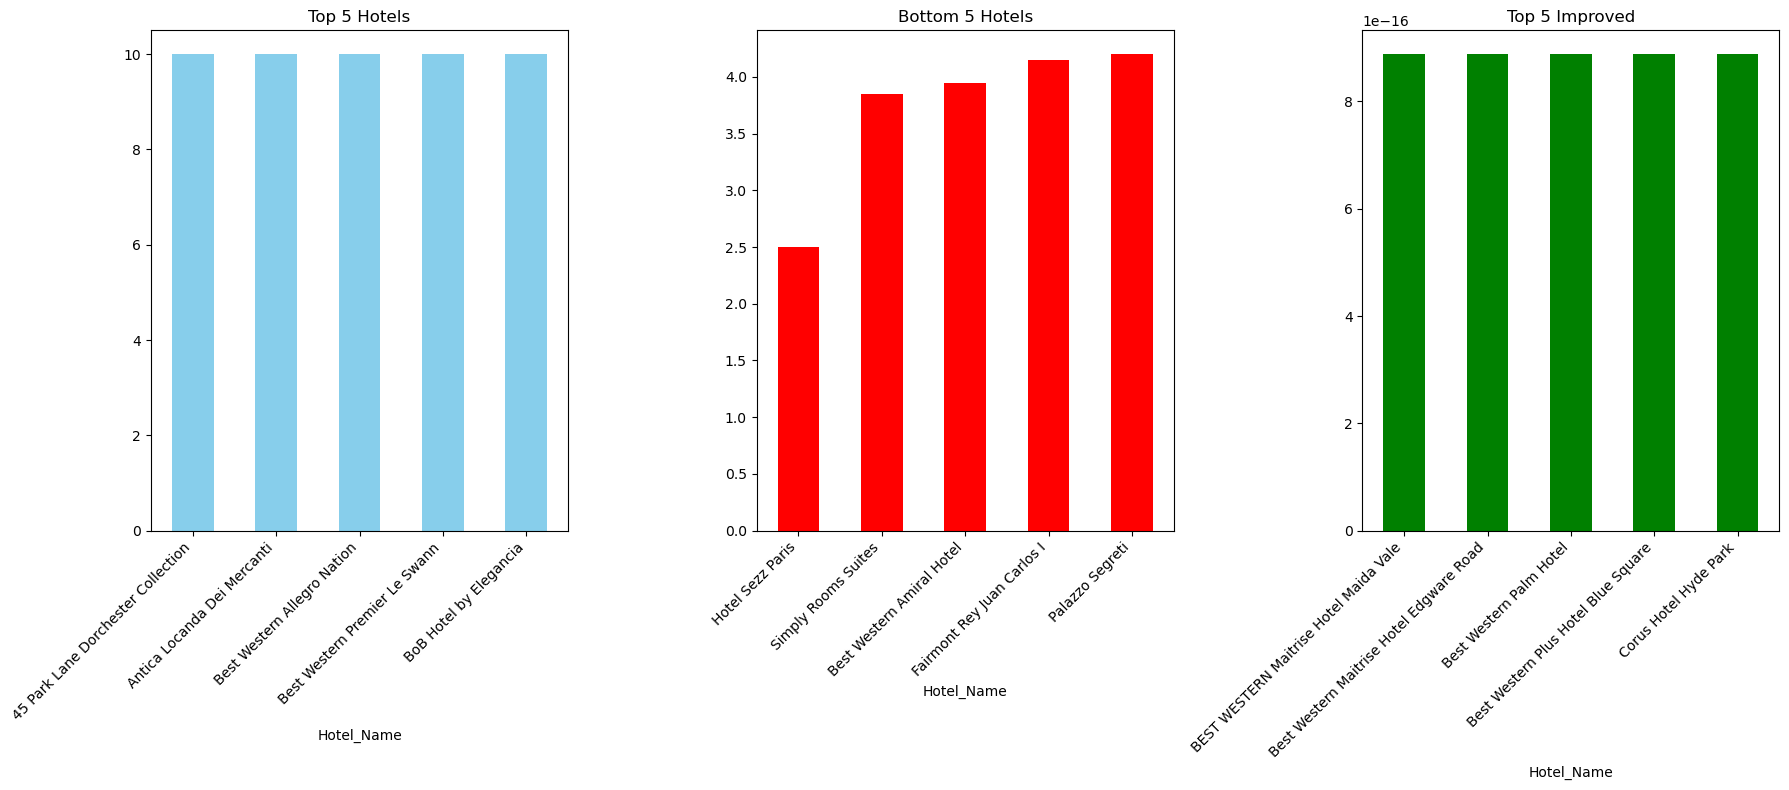

In [315]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
top_five_high_ratings.plot(kind='bar', color='skyblue')
plt.title('Top 5 Hotels')
#plt.xlabel('Hotel Name')
#plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
top_five_low_ratings.plot(kind='bar', color='red')
plt.title('Bottom 5 Hotels')
#plt.xlabel('Hotel Name')
#plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')


plt.subplot(1, 3, 3)
top5.plot(kind='bar', color='green')
plt.title('Top 5 Improved')
#plt.xlabel('Hotel Name')
#plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Since the sample data has only 15000 datapoints, there is no visible improvement in the ratings. However, if the whole dataset is considered, we can see the actual improvement.